In [ ]:
# 1. Data Integration - Aggregation - year, gender/year, country/year
# 2. Data Transformation - normalization, labelencoding
# 3. Data Reduction - reduce by country and year (PHL and Malysia)

In [ ]:
## Data Integration
# Merge Unemployment and Suicide Rate

In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
umemployment_df = pd.read_csv("./cleaned_data/cleaned_unemployment.csv")

In [ ]:
suicide_df = pd.read_csv("./cleaned_data/cleaned_suicide.csv")

In [ ]:
umemployment_df.shape

(1620, 4)

In [ ]:
suicide_df.shape

(540, 4)

In [ ]:
umemployment_df.head()

,country_code,gender,year,unemployment
0,AUS,MA,1995,2.16
1,PHL,MA,1995,16.04
2,THA,MA,1995,1.59
3,VNM,MA,1995,1.87
4,GBR,MA,1995,4.38


In [ ]:
suicide_df.head()

,country_code,gender,year,suicide
0,AUS,FE,1995,5.6
1,PHL,FE,1995,0.9
2,THA,FE,1995,7.4
3,VNM,FE,1995,4.7
4,GBR,FE,1995,4.3


In [ ]:
# AGGREGATION of unemployment by year
unemployment_agg_year = umemployment_df.groupby(['year'], as_index=False).mean()
unemployment_agg_year.head()

,year,unemployment
0,1995,5.892667
1,1996,5.898667
2,1997,5.787833
3,1998,5.721833
4,1999,4.764167


In [ ]:
# AGGREGATION of unemployment by gender and year
unemployment_agg_genyear = umemployment_df.groupby(['year','gender',], as_index=False).mean()
unemployment_agg_genyear.head()

,year,gender,unemployment
0,1995,FE,5.587667
1,1995,MA,6.197667
2,1996,FE,5.984333
3,1996,MA,5.813000
4,1997,FE,5.846667


In [ ]:
# AGGREGATION of unemployment by female and year
unemployment_agg_femyear = unemployment_agg_genyear[unemployment_agg_genyear['gender'].str.contains('FE')]
unemployment_agg_femyear.head()

,year,gender,unemployment
0,1995,FE,5.587667
2,1996,FE,5.984333
4,1997,FE,5.846667
6,1998,FE,5.756667
8,1999,FE,5.079333


In [ ]:
# AGGREGATION of unemployment by male and year
unemployment_agg_maleyear = unemployment_agg_genyear[unemployment_agg_genyear['gender'].str.contains('MA')]
unemployment_agg_maleyear.head()

,year,gender,unemployment
1,1995,MA,6.197667
3,1996,MA,5.813000
5,1997,MA,5.729000
7,1998,MA,5.687000
9,1999,MA,4.449000


In [ ]:
# AGGREGATION of unemployment by country and year
unemployment_agg_counyear = umemployment_df.groupby(['year', 'country_code'], as_index=False).mean()
unemployment_agg_counyear

,year,country_code,unemployment
0,1995,ARE,2.351667
1,1995,AUS,11.161667
2,1995,GBR,15.108333
3,1995,MMR,2.206667
4,1995,MYS,3.078333
...,...,...,...
265,2021,PHL,6.958333
266,2021,SGP,4.090000
267,2021,THA,0.998333
268,2021,USA,9.456667


In [ ]:
# AGGREGATION of suicide by year
suicide_agg_year = suicide_df.groupby(['year'], as_index=False).mean()
suicide_agg_year.head()

,year,suicide
0,1995,8.15
1,1996,8.15
2,1997,8.15
3,1998,8.15
4,1999,8.15


In [ ]:
# AGGREGATION of suicide by gender and year
suicide_agg_genyear = suicide_df.groupby(['year', 'gender'], as_index=False).mean()
suicide_agg_genyear.head()

,year,gender,suicide
0,1995,FE,4.45
1,1995,MA,11.85
2,1996,FE,4.45
3,1996,MA,11.85
4,1997,FE,4.45


In [ ]:
# AGGREGATION of unemployment by female and year
suicide_agg_femyear = suicide_agg_genyear[suicide_agg_genyear['gender'].str.contains('FE')]
suicide_agg_femyear.head()

,year,gender,suicide
0,1995,FE,4.45
2,1996,FE,4.45
4,1997,FE,4.45
6,1998,FE,4.45
8,1999,FE,4.45


In [ ]:
# AGGREGATION of unemployment by male and year
suicide_agg_maleyear = suicide_agg_genyear[suicide_agg_genyear['gender'].str.contains('MA')]
suicide_agg_maleyear.head()

,year,gender,suicide
1,1995,MA,11.85
3,1996,MA,11.85
5,1997,MA,11.85
7,1998,MA,11.85
9,1999,MA,11.85


In [ ]:
# AGGREGATION of suicide by country and year
suicide_agg_counyear = suicide_df.groupby(['year', 'country_code'], as_index=False).mean()
suicide_agg_counyear.head()

,year,country_code,suicide
0,1995,ARE,7.35
1,1995,AUS,12.75
2,1995,GBR,8.65
3,1995,MMR,4.75
4,1995,MYS,4.65


In [ ]:
# Merging of Suicide and Unemployment in 1 Table
unemployment_suicide = unemployment_agg_year.merge(suicide_agg_year)
unemployment_suicide.head()

,year,unemployment,suicide
0,1995,5.892667,8.15
1,1996,5.898667,8.15
2,1997,5.787833,8.15
3,1998,5.721833,8.15
4,1999,4.764167,8.15


In [ ]:
# unemployment_agg_year
# unemployment_agg_genyear
# unemployment_agg_counyear
# suicide_agg_year
# suicide_agg_genyear
# suicide_agg_counyear
# unemployment_suicide

In [ ]:
# Data Normalization
unemployment_agg_year['unemployment'] = unemployment_agg_year['unemployment'].div(100)
unemployment_agg_genyear['unemployment'] = unemployment_agg_genyear['unemployment'].div(100)
unemployment_agg_counyear['unemployment'] = unemployment_agg_counyear['unemployment'].div(100)
suicide_agg_year['suicide'] = suicide_agg_year['suicide'].div(100)
suicide_agg_genyear['suicide'] = suicide_agg_genyear['suicide'].div(100)
suicide_agg_counyear['suicide'] = suicide_agg_counyear['suicide'].div(100)
unemployment_suicide['unemployment'] = unemployment_suicide['unemployment'].div(100)
unemployment_suicide['suicide'] = unemployment_suicide['suicide'].div(100)
unemployment_agg_femyear['unemployment'] = unemployment_agg_femyear['unemployment'].div(100)
unemployment_agg_maleyear['unemployment'] = unemployment_agg_maleyear['unemployment'].div(100)
suicide_agg_femyear['suicide'] = suicide_agg_femyear['suicide'].div(100)
suicide_agg_maleyear['suicide'] = suicide_agg_maleyear['suicide'].div(100)




In [ ]:
# Data Reduction
# - reduce to Philippines and Malaysia only

In [ ]:
# REDUCTION of unemployment by country(PHL) and year
unemployment_agg_phlyear = unemployment_agg_counyear[unemployment_agg_counyear['country_code'].str.contains('PHL')]
unemployment_agg_phlyear.head()

,year,country_code,unemployment
5,1995,PHL,0.121617
15,1996,PHL,0.121617
25,1997,PHL,0.121617
35,1998,PHL,0.121617
45,1999,PHL,0.121617


In [ ]:
# REDUCTION of unemployment by country(MYS) and year
unemployment_agg_mysyear = unemployment_agg_counyear[unemployment_agg_counyear['country_code'].str.contains('MYS')]
unemployment_agg_mysyear.head()

,year,country_code,unemployment
4,1995,MYS,0.030783
14,1996,MYS,0.030783
24,1997,MYS,0.030783
34,1998,MYS,0.030783
44,1999,MYS,0.030783


In [ ]:
# REDUCTION of suicide by country(PHL) and year
suicide_agg_phlyear = suicide_agg_counyear[suicide_agg_counyear['country_code'].str.contains('PHL')]
suicide_agg_phlyear.head()

,year,country_code,suicide
5,1995,PHL,0.0175
15,1996,PHL,0.0175
25,1997,PHL,0.0175
35,1998,PHL,0.0175
45,1999,PHL,0.0175


In [ ]:
# REDUCTION of suicide by country(PHL) and year
suicide_agg_mysyear = suicide_agg_counyear[suicide_agg_counyear['country_code'].str.contains('MYS')]
suicide_agg_mysyear.head()

,year,country_code,suicide
4,1995,MYS,0.0465
14,1996,MYS,0.0465
24,1997,MYS,0.0465
34,1998,MYS,0.0465
44,1999,MYS,0.0465


Text(0.5, 1.0, 'Mean of Unemployment and Suicide Rate from 1995 - 2021 in 10 Countries')

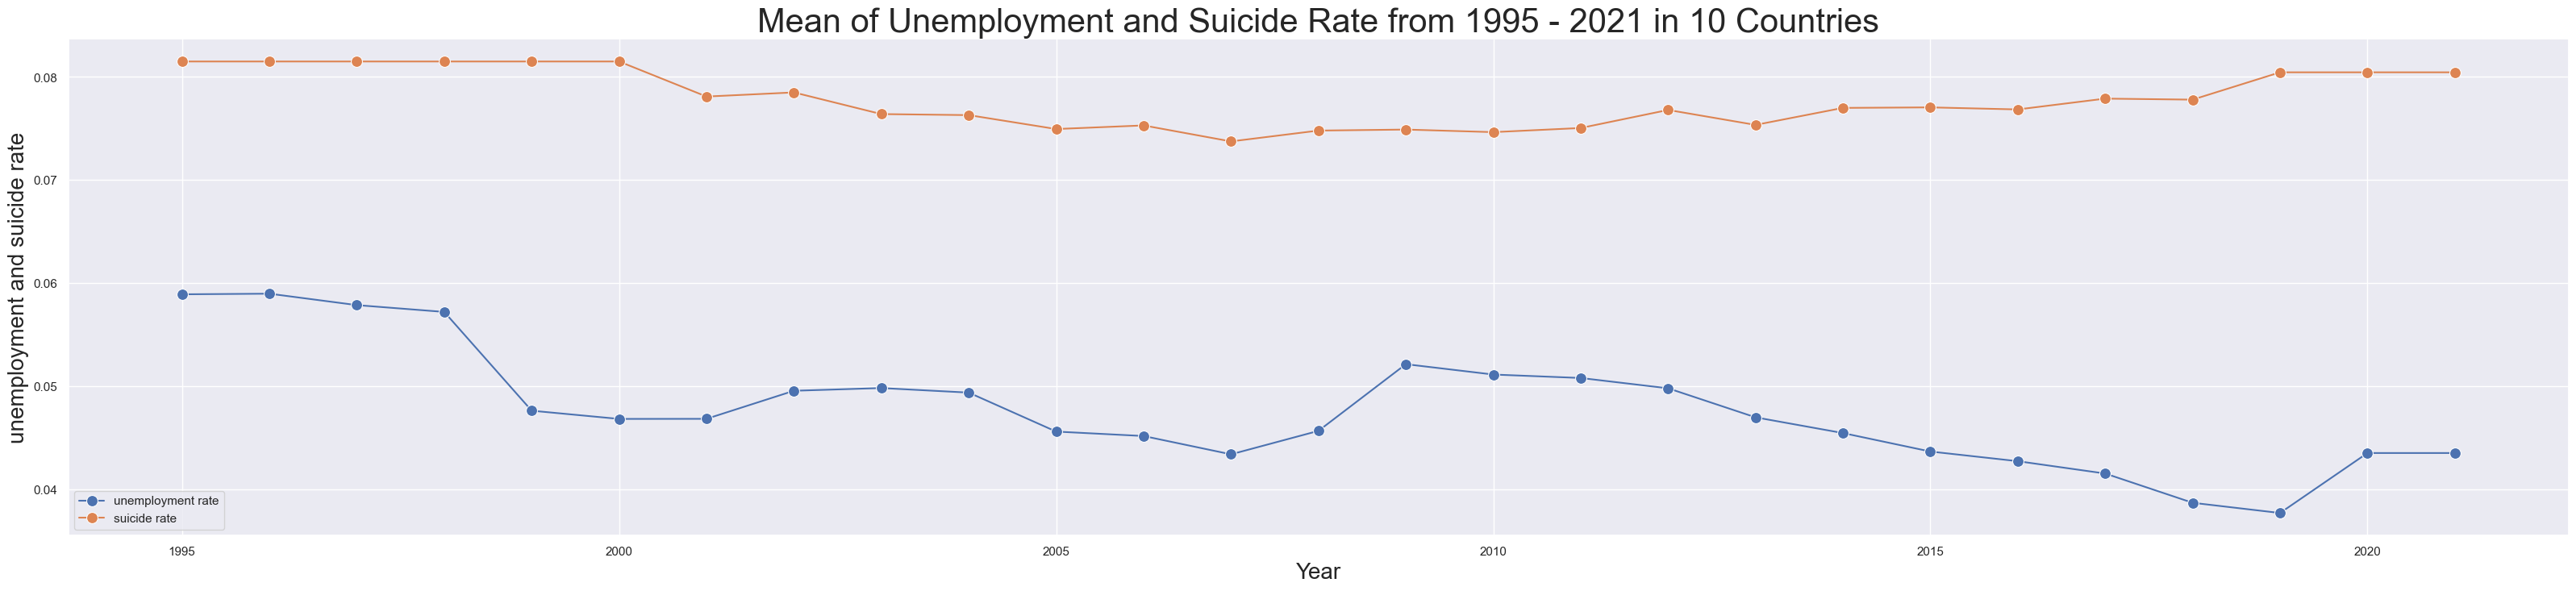

In [ ]:
sns.set(rc = {'figure.figsize':(40,8)})

sns.lineplot(data=unemployment_suicide, x=unemployment_suicide.year, y=unemployment_suicide['unemployment'],  marker='.', markersize=20, label="unemployment rate")
sns.lineplot(data=unemployment_suicide, x=unemployment_suicide.year, y=unemployment_suicide['suicide'], marker='.', markersize=20, label="suicide rate")

plt.xlabel("Year", size=20)
plt.ylabel("unemployment and suicide rate", size=20)
plt.title("Mean of Unemployment and Suicide Rate from 1995 - 2021 in 10 Countries", size=30)

Text(0.5, 1.0, 'Mean of Unemployment Rate from 1995 - 2021 in 10 Countries')

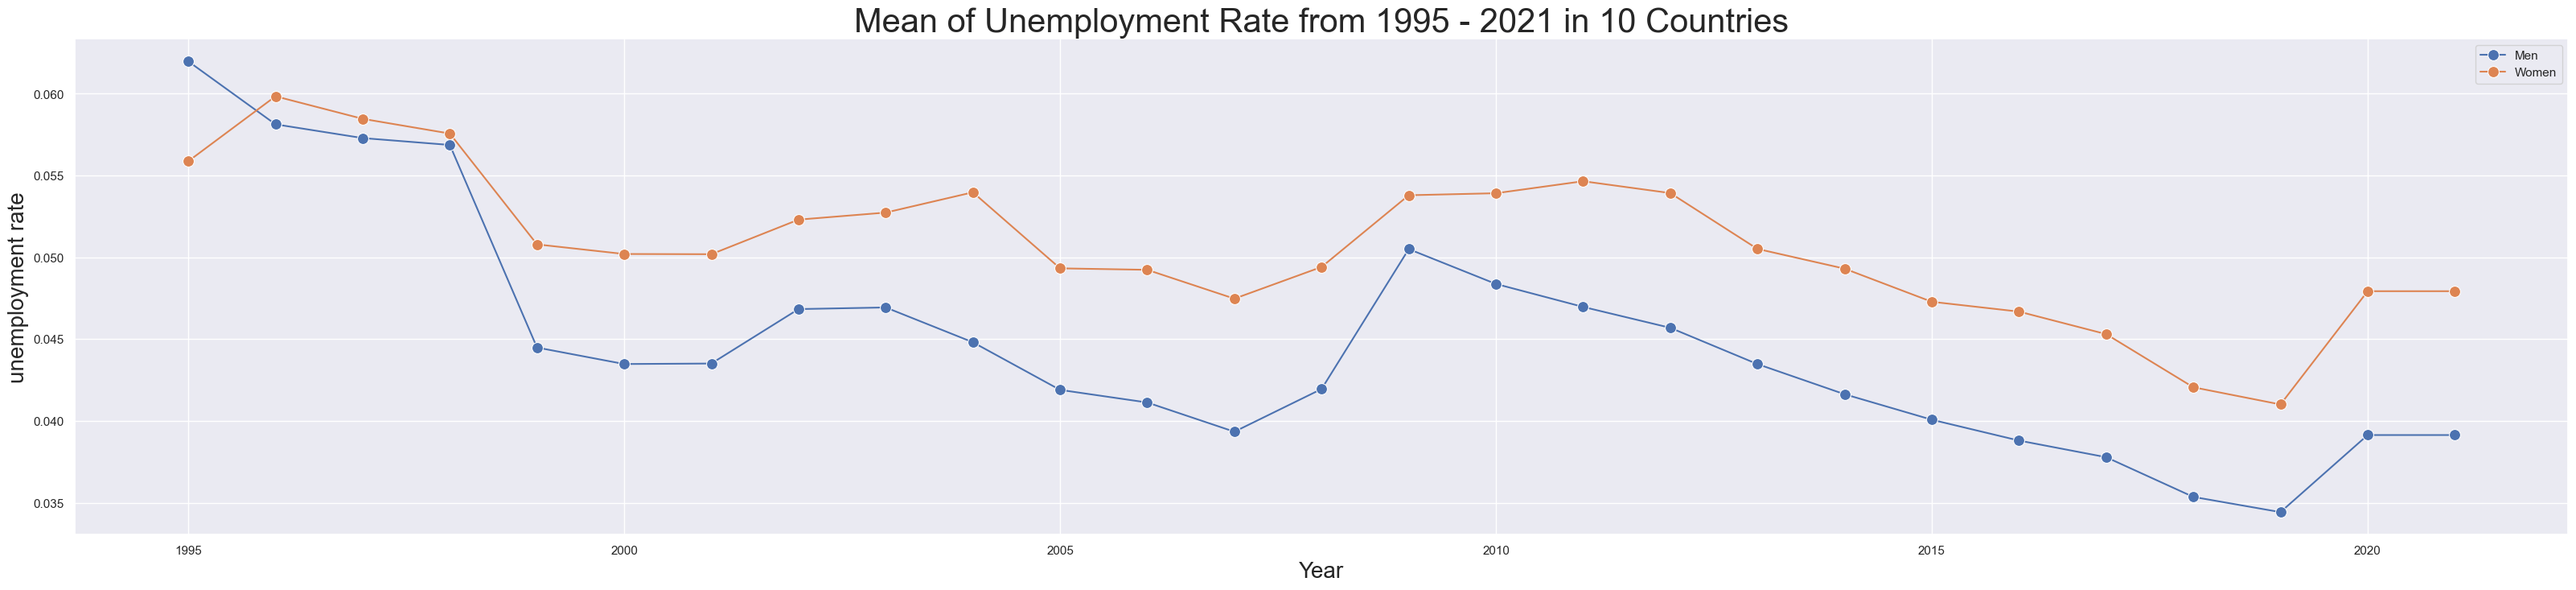

In [ ]:
sns.set(rc = {'figure.figsize':(40,8)})

sns.lineplot(data=unemployment_agg_maleyear, x=unemployment_agg_maleyear.year, y=unemployment_agg_maleyear['unemployment'],  marker='.', markersize=20, label="Men")
sns.lineplot(data=unemployment_agg_femyear, x=unemployment_agg_femyear.year, y=unemployment_agg_femyear['unemployment'], marker='.', markersize=20, label="Women")

plt.xlabel("Year", size=20)
plt.ylabel("unemployment rate", size=20)
plt.title("Mean of Unemployment Rate from 1995 - 2021 in 10 Countries", size=30)

Text(0.5, 1.0, 'Mean of Suicide Rate from 1995 - 2021 in 10 Countries')

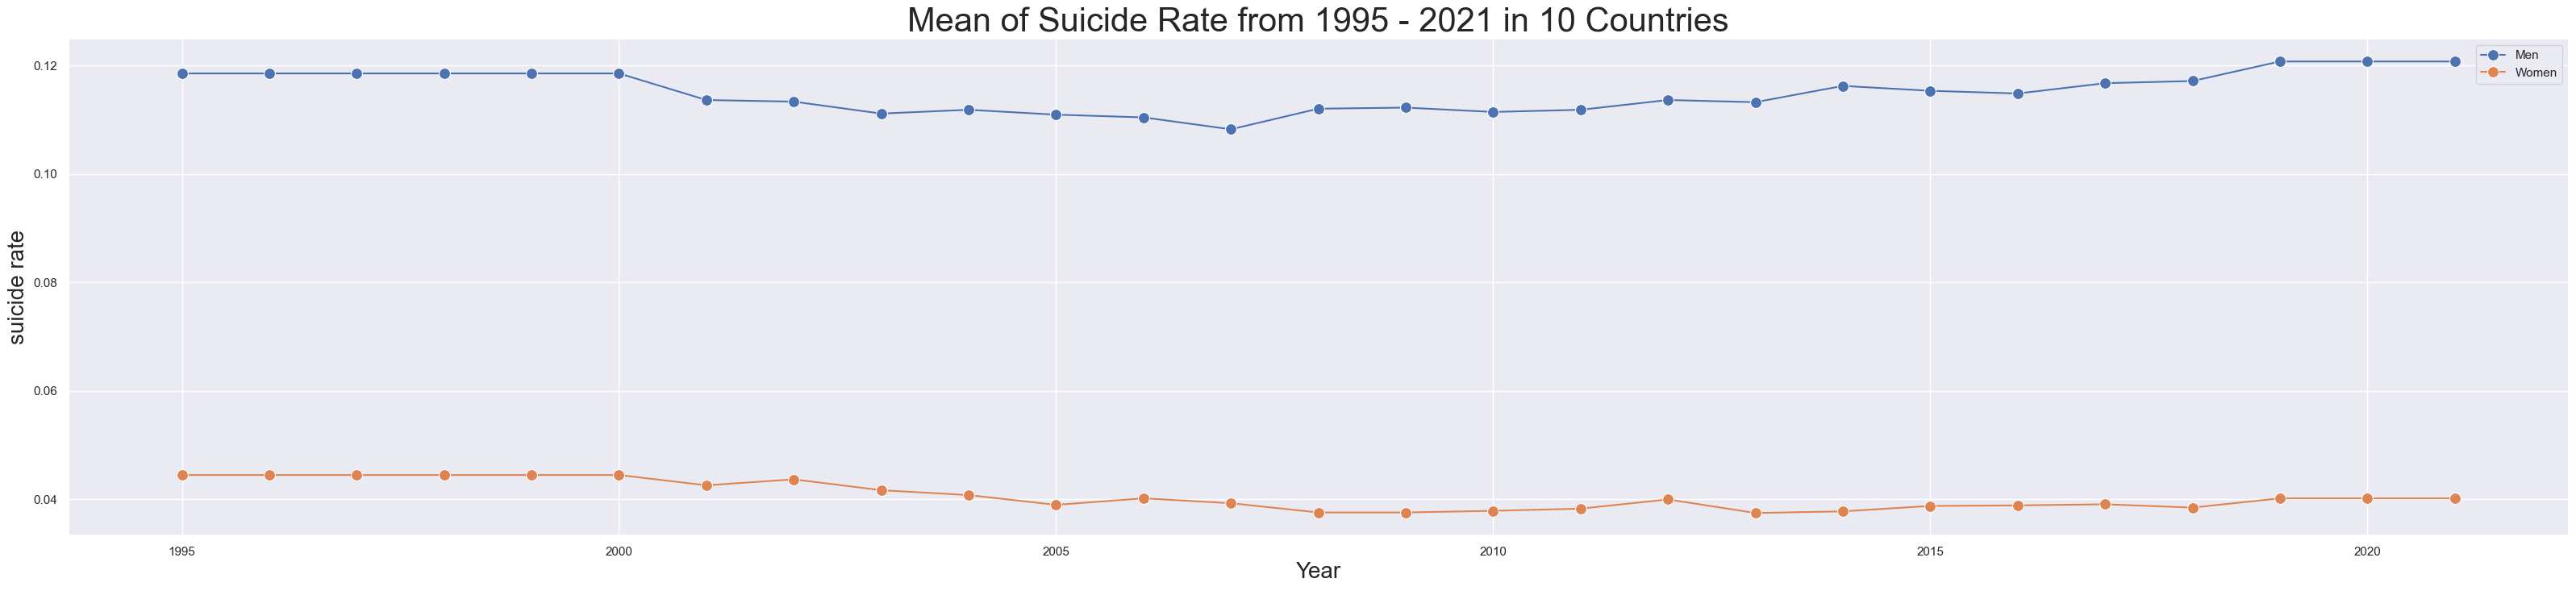

In [ ]:
sns.set(rc = {'figure.figsize':(40,8)})

sns.lineplot(data=suicide_agg_maleyear, x=suicide_agg_maleyear.year, y=suicide_agg_maleyear['suicide'],  marker='.', markersize=20, label="Men")
sns.lineplot(data=suicide_agg_femyear, x=suicide_agg_femyear.year, y=suicide_agg_femyear['suicide'], marker='.', markersize=20, label="Women")

plt.xlabel("Year", size=20)
plt.ylabel("suicide rate", size=20)
plt.title("Mean of Suicide Rate from 1995 - 2021 in 10 Countries", size=30)

Text(0.5, 1.0, 'Mean of Unemployment Rate from 1995 - 2021 in the Philippines and Malaysia')

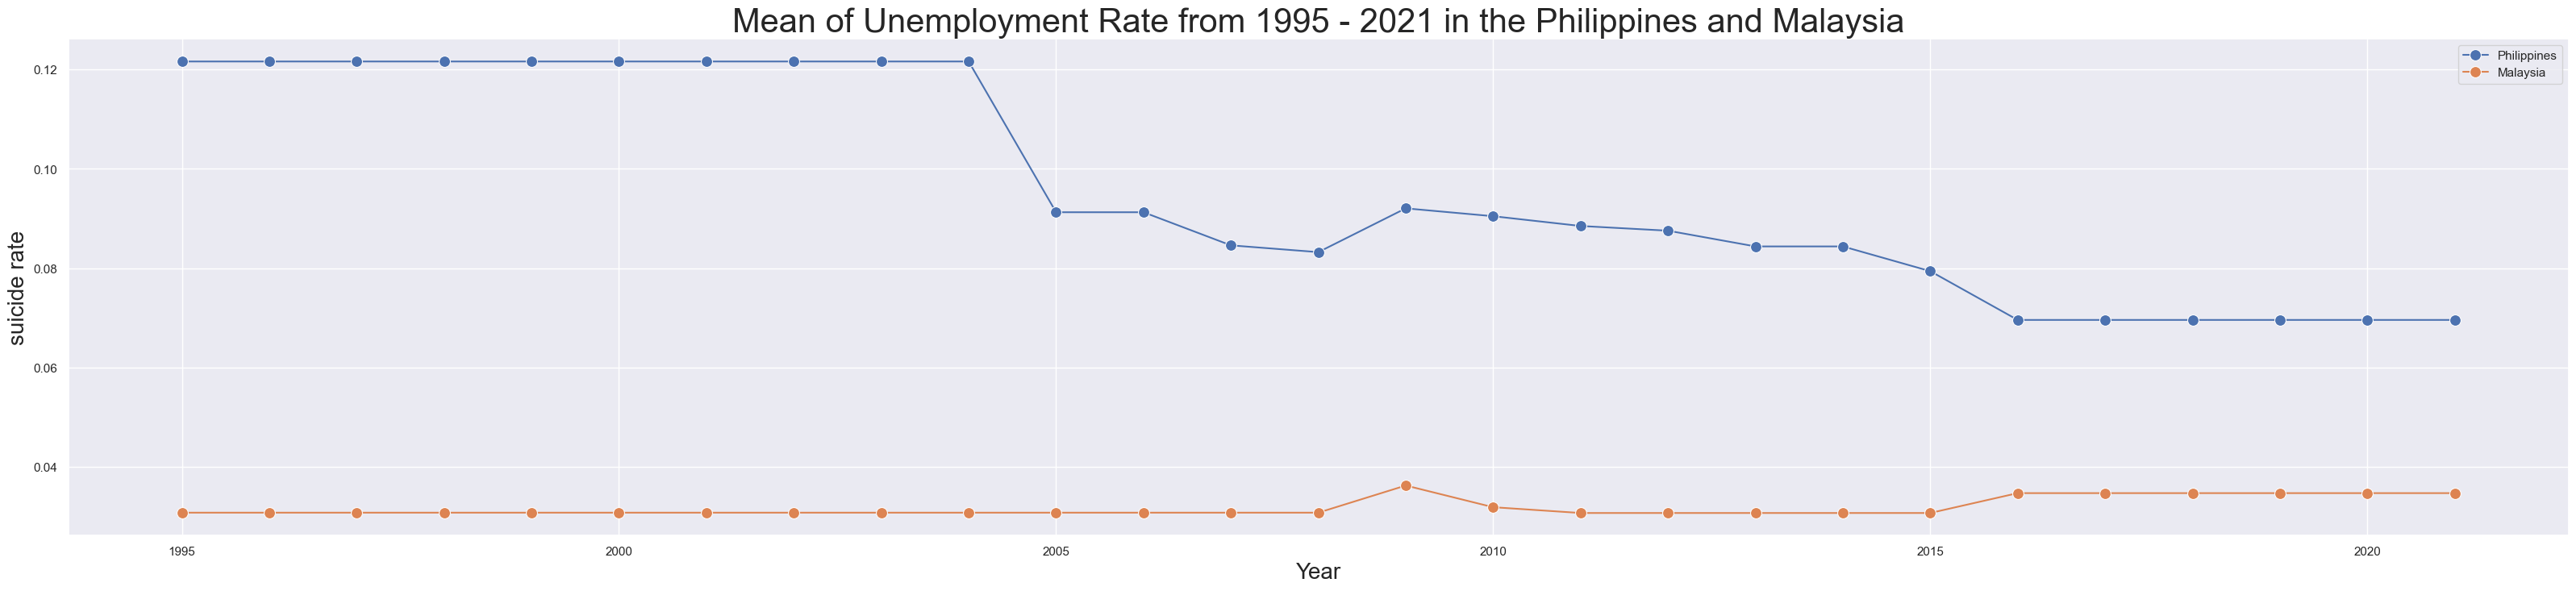

In [ ]:
sns.set(rc = {'figure.figsize':(40,8)})

sns.lineplot(data=unemployment_agg_phlyear, x=unemployment_agg_phlyear.year, y=unemployment_agg_phlyear['unemployment'],  marker='.', markersize=20, label="Philippines")
sns.lineplot(data=unemployment_agg_mysyear, x=unemployment_agg_mysyear.year, y=unemployment_agg_mysyear['unemployment'], marker='.', markersize=20, label="Malaysia")

plt.xlabel("Year", size=20)
plt.ylabel("suicide rate", size=20)
plt.title("Mean of Unemployment Rate from 1995 - 2021 in the Philippines and Malaysia", size=30)

Text(0.5, 1.0, 'Mean of Suicide Rate from 1995 - 2021 in the Philippines and Malaysia')

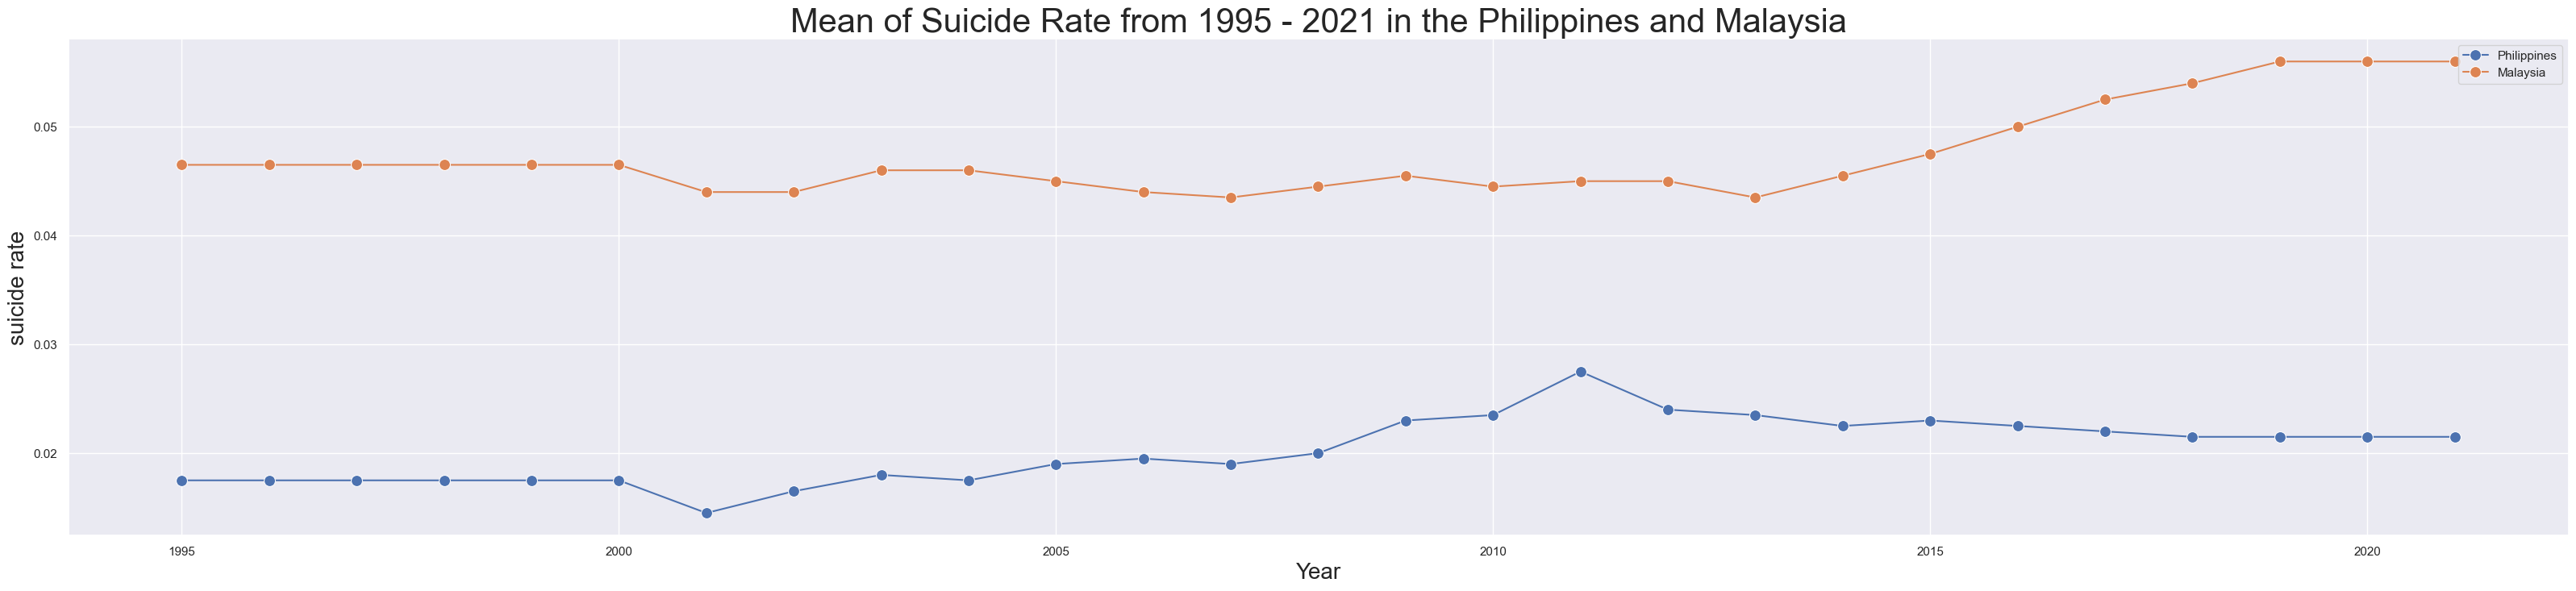

In [ ]:
sns.set(rc = {'figure.figsize':(40,8)})

sns.lineplot(data=suicide_agg_phlyear, x=suicide_agg_phlyear.year, y=suicide_agg_phlyear['suicide'],  marker='.', markersize=20, label="Philippines")
sns.lineplot(data=suicide_agg_mysyear, x=suicide_agg_mysyear.year, y=suicide_agg_mysyear['suicide'], marker='.', markersize=20, label="Malaysia")

plt.xlabel("Year", size=20)
plt.ylabel("suicide rate", size=20)
plt.title("Mean of Suicide Rate from 1995 - 2021 in the Philippines and Malaysia", size=30)